# 0. Set Objectives

# 1. Manage working env

## 1.1.Manage virtual env

## 1.2. Import python libraries

In [1]:
#regular python lib
import os
import pandas as pd
import numpy as np
import joblib
import pickle
import multiprocessing as mp

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve

#preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline

from CombinedAttributesAdder import CombinedAttributesAdder         #custom transform

#model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

#eval
from sklearn.metrics import mean_squared_error
from scipy import stats

#visualization
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1.3. Load data

In [2]:
cwd = os.getcwd()
df = pd.read_csv(os.path.join(cwd, 'Dataset/housing.csv'))
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

# 2. EDA

## 2.1. Basic data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [6]:
df.describe(exclude='number')

ocean_proximity
count            20640
unique               5
top          <1H OCEAN
freq              9136

## 2.2. Show missing values

* NaN values per columns :
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


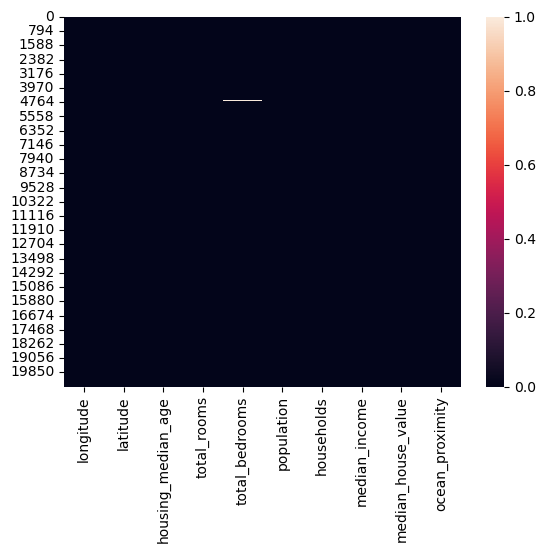

In [7]:
print('* NaN values per columns :')
print(df.isnull().sum())

sns.heatmap(data=df.isnull())
plt.show()

## 2.3. Content Investigation

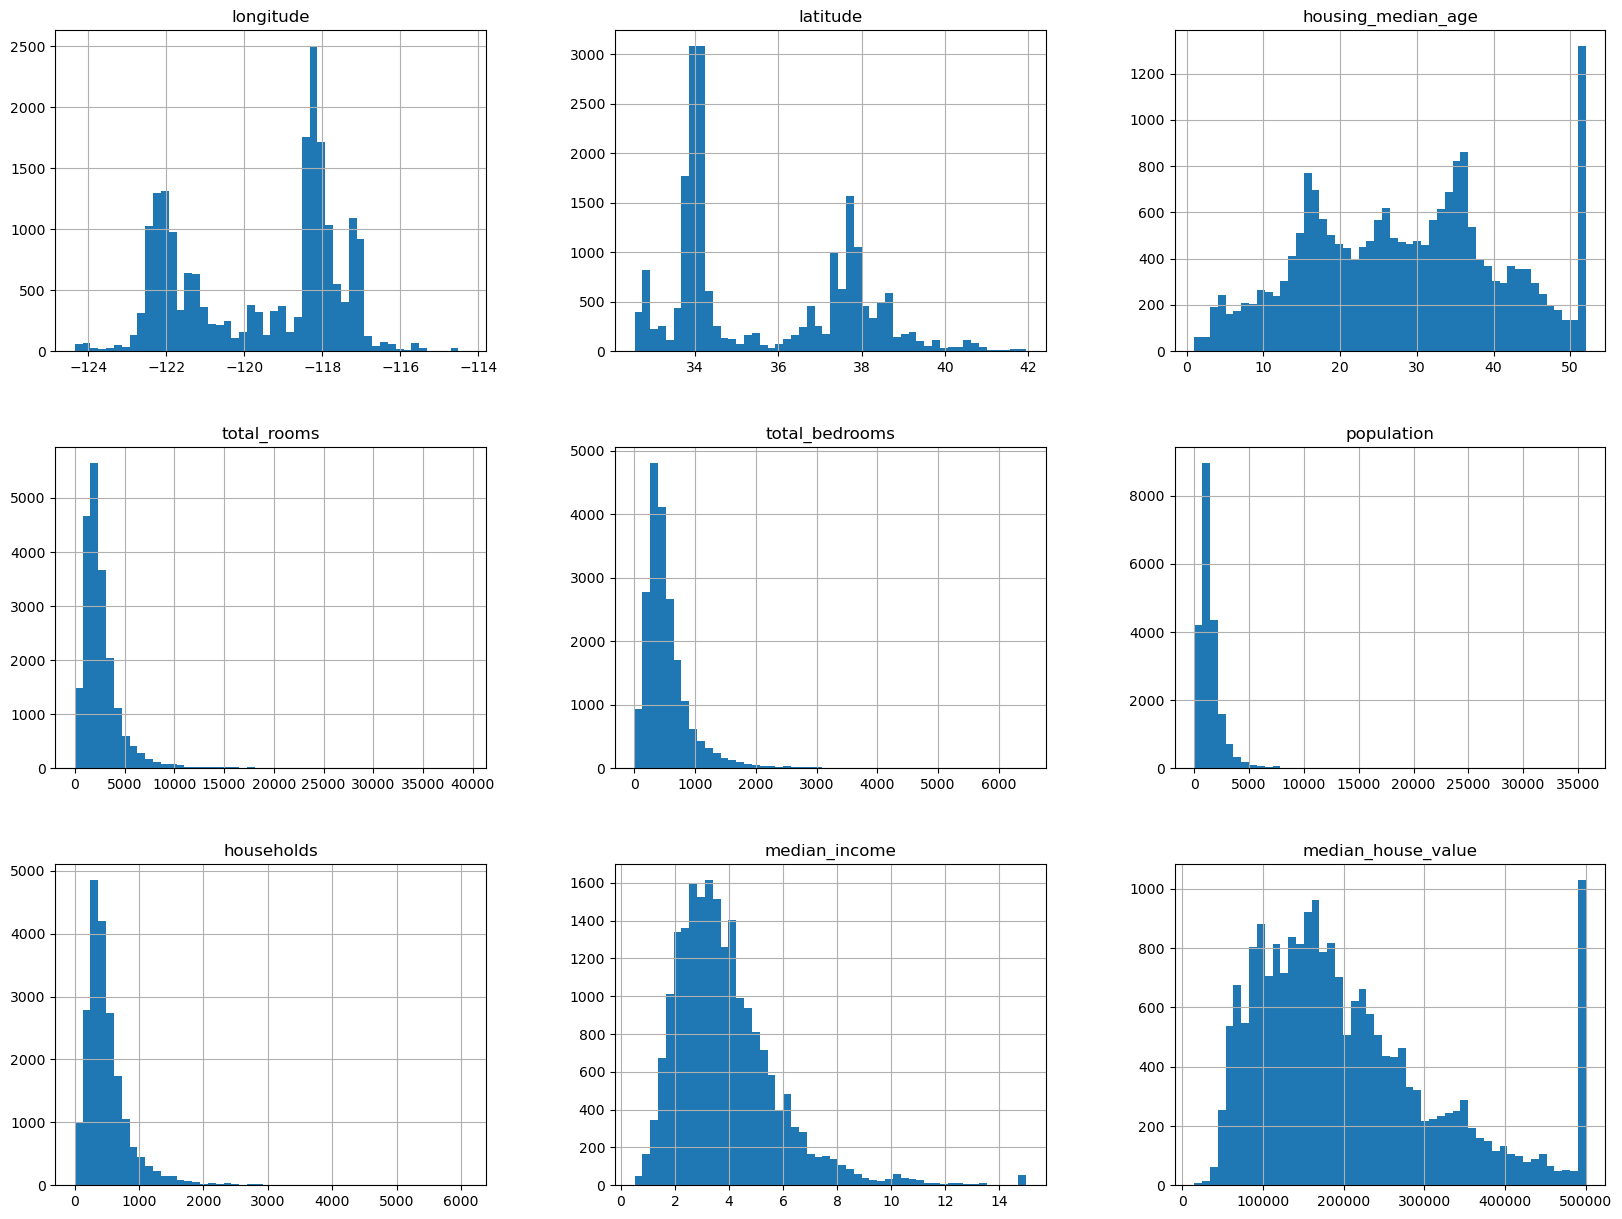

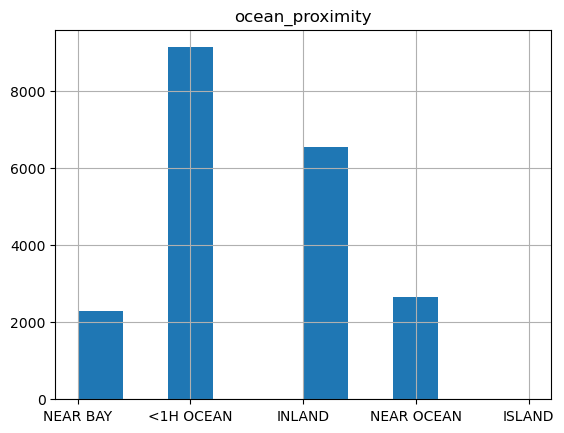

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

df['ocean_proximity'].hist()
plt.title('ocean_proximity')
plt.show()

In [9]:
fig = px.scatter(df, x="households", y="total_rooms", marginal_y="violin", marginal_x="box", template="simple_white")
fig.show()

## 2.4. Features' correlation

In [10]:
housing = df.copy()

In [11]:
fig = px.scatter_mapbox(housing, lat="latitude", lon="longitude", color="median_house_value", size="population",
                  color_continuous_scale=px.colors.sequential.Jet, zoom=5, width=1000, opacity=0.5, height= 750,
                  mapbox_style="carto-positron")
fig.show()

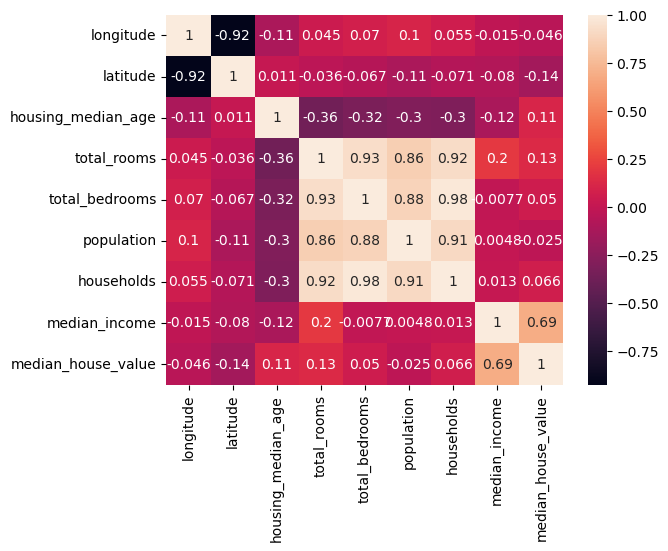

In [12]:
attribs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income',
           'median_house_value']

corr_matrix = housing[attribs].corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

In [13]:
fig = px.scatter_matrix(housing, height=1200, color="ocean_proximity", opacity=.1)
fig.show()

/opt/anaconda3/envs/housing_project/lib/python3.10/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



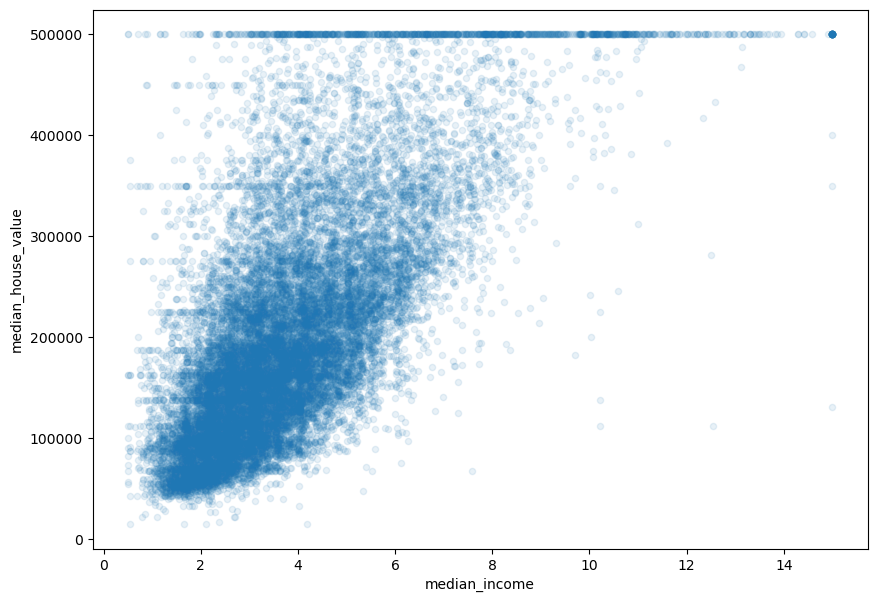

In [14]:
housing.plot(kind="scatter",
             x='median_income', y='median_house_value',
             figsize=(10,7), alpha=.1)
plt.show()

## 2.5. Feature engineering

In [15]:
#permet de donner des indications sur la taille des maisons
housing['rooms_per_housing'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

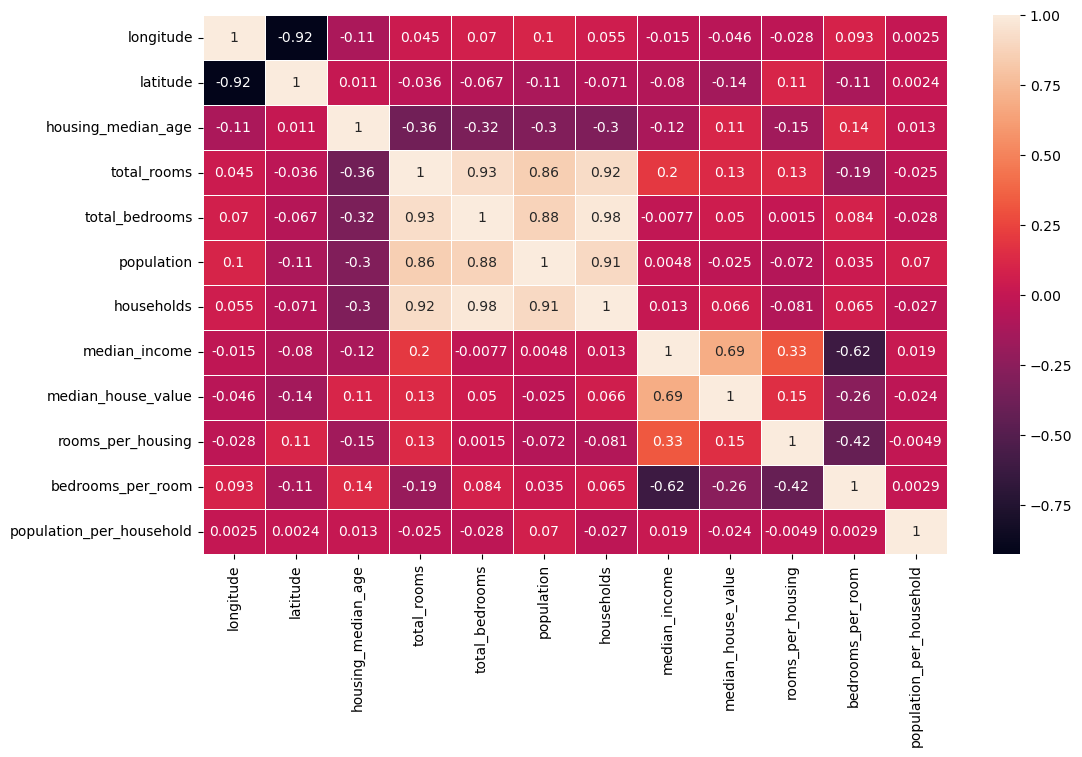

median_house_value          1.000000
median_income               0.688075
rooms_per_housing           0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [16]:
attribs = attribs + ['rooms_per_housing', 'bedrooms_per_room', 'population_per_household']

corr_matrix = housing[attribs].corr()

fig, ax = plt.subplots(figsize=(12,7))         # Sample figsize in inches
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)
plt.show()

corr_matrix['median_house_value'].sort_values(ascending=False)

## 3. Preprocessing

## 3.1. Remove Outliers

In [17]:
columns = list(df.select_dtypes([np.number]).columns)
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

df_out = df.copy()

for column in columns:
    df_out = df_out[df_out[column]>lower_limit[column]]
    df_out = df_out[df_out[column]<upper_limit[column]]

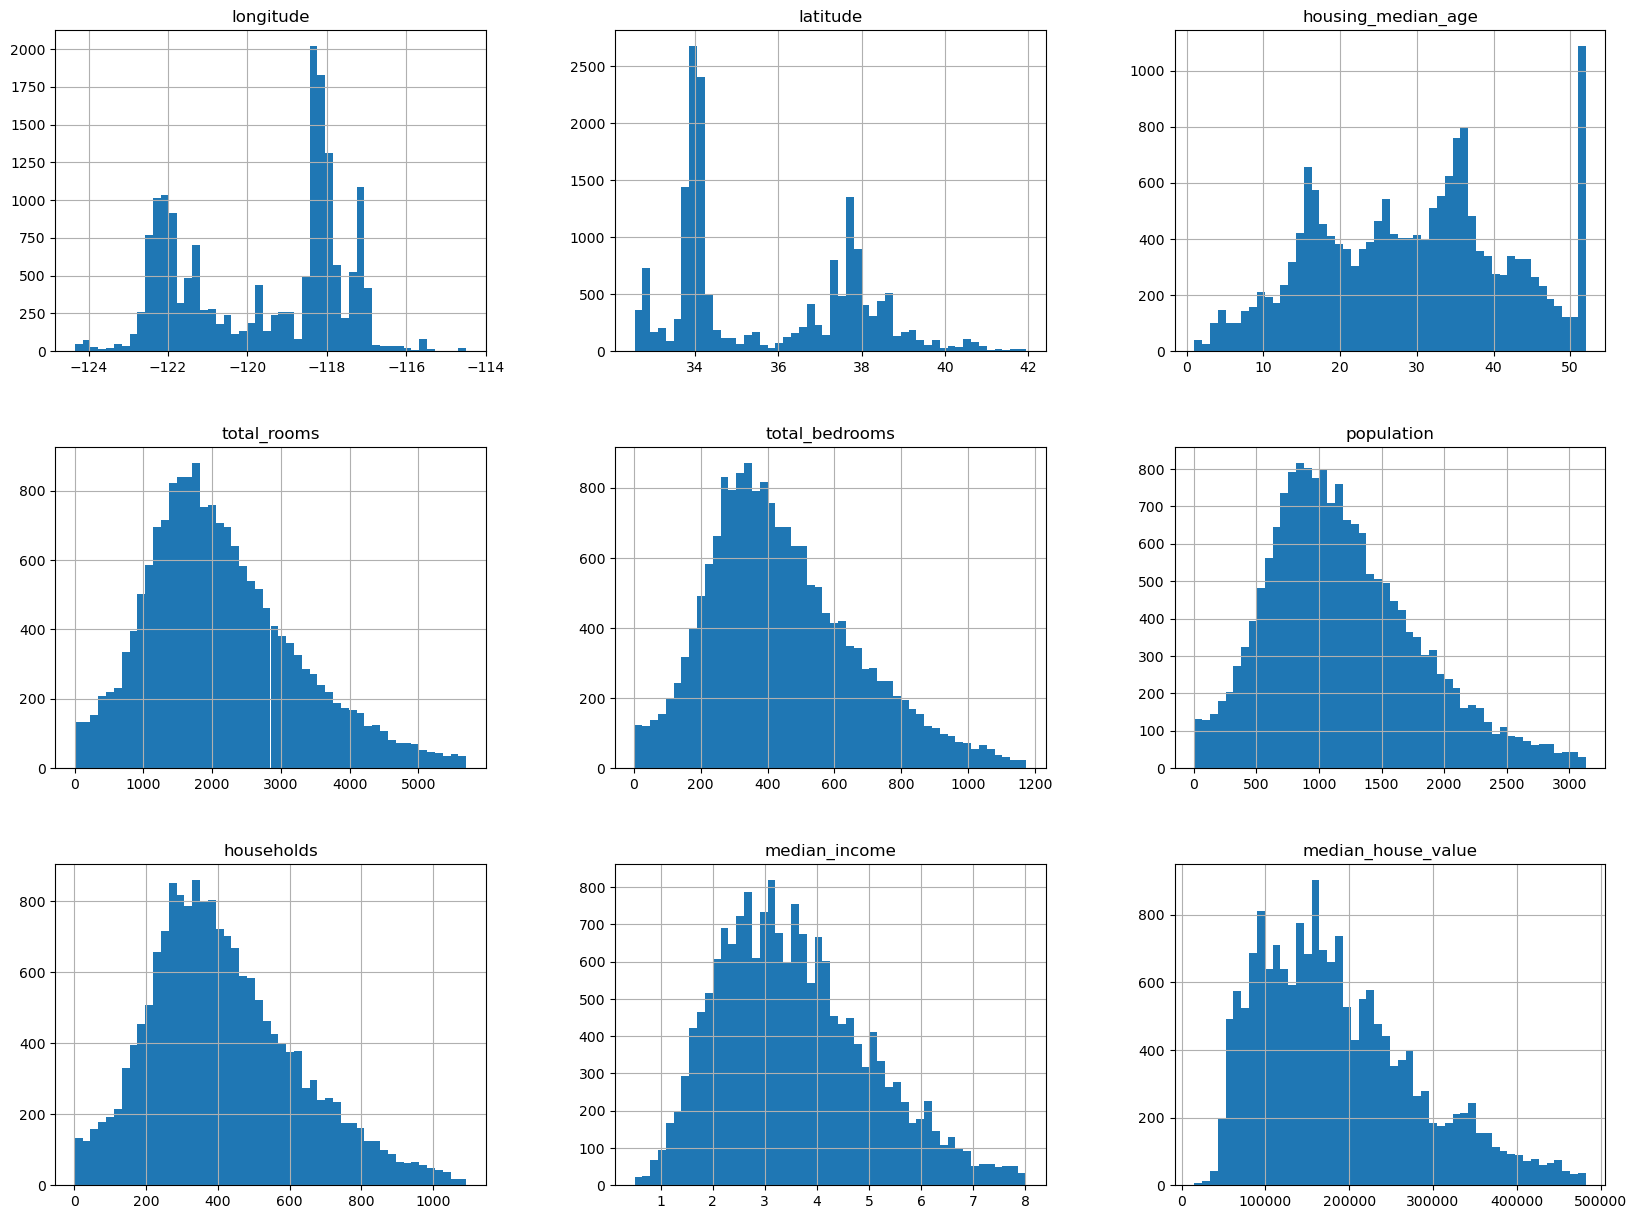

In [18]:
df_out.hist(bins=50, figsize=(20,15))
plt.show()

## 3.2. Train Test split datasets

In [19]:
df_out['income_cat'] = pd.cut(df_out['median_income'],
                          bins=[0., 1.5, 3., 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])

attributes = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'income_cat', 'ocean_proximity']
label = ['median_house_value']

X = df_out[attributes]
y = df_out[label]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0, stratify=X['income_cat'])

#remove income cat
for set_ in (X_train, X_test):
    set_.drop('income_cat', axis=1, inplace=True)

In [20]:
num_attributes = make_column_selector(dtype_include=np.number)
cat_attributes = make_column_selector(dtype_exclude=np.number)

## 3.3. Preprocessing pipeline

In [21]:
#data preprocessing
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),              
    ('combine_att', CombinedAttributesAdder(add_bedrooms_per_room=True)),   #custom transofm
    #('pt', PowerTransformer(method='yeo-johnson')),
    ('std_scaler', StandardScaler())
    #('rbst_scaler', RobustScaler())
])

cat_pipeline = Pipeline([
    ('onehot_cat', OneHotEncoder())
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_attributes),
    ('cat', cat_pipeline, cat_attributes)
])

# 4. ML

## 4.1. Define ML models

In [22]:
#Define models
rdm_state = 0 #set random_state for reproductibility

lin = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=rdm_state)
svr = SVR()
forest = RandomForestRegressor(random_state=rdm_state)
xgb = GradientBoostingRegressor(random_state=rdm_state)

models = [lin, knn, tree, svr, forest, xgb]

## 4.2. Train models

In [23]:
#Train models
def Train_model(model_i):
    #fit model
    model = make_pipeline(preprocessor, model_i)
    model.fit(X_train, y_train.values.ravel())

    #get cross_val_score
    scores = cross_val_score(model, X_train, y_train.values.ravel(),
                         scoring='neg_mean_squared_error', cv=10)                   #cv default     #2 ou 3 metrics 2 std et 1 adatpté au cas d'usage           R^2 et -RMSE
    model_rmse = np.sqrt(-scores)
    print(type(model_i).__name__ + '_rmse : ' + '{}'.format(model_rmse.mean()))
    print(type(model_i).__name__ + '_std : ' + '{}'.format(model_rmse.std()))

    #save models
    model_file_name = 'Models/' + type(model_i).__name__ + '.pkl'
    with open(model_file_name, 'wb') as file:
        pickle.dump(model, file)

#multiprocessing the training
pool = mp.pool.ThreadPool()
pool.map(Train_model, models)

LinearRegression_rmse : 57017.55312839155
LinearRegression_std : 1362.1598066921224
KNeighborsRegressor_rmse : 52665.84014784186
KNeighborsRegressor_std : 2393.4058566268864
DecisionTreeRegressor_rmse : 62399.054475063516
DecisionTreeRegressor_std : 1692.4761519184467
GradientBoostingRegressor_rmse : 46800.992657944225
GradientBoostingRegressor_std : 1430.68077673665
SVR_rmse : 94784.78339384022
SVR_std : 1397.6795994582849
RandomForestRegressor_rmse : 43973.4378496108
RandomForestRegressor_std : 870.474655014293


[None, None, None, None, None, None]

## 4.3. Optimize top model

In [24]:
#grid search cv
param_grid = [
    {'n_estimators': [600, 800, 1000], 'max_features': [5, 6, 7]}   #méthode itérative pour trouver le domaine des hyperparamètres (possibilité d'expérience de Taguchi avec surface de réponse)
]                                                                   #possibilité ainsi de trouver l'optimum des configurations des hyparamètres (méthode gourmande en ressource)
                                                                    #https://support.minitab.com/fr-fr/minitab/20/help-and-how-to/statistical-modeling/doe/supporting-topics/taguchi-designs/catalogue-of-taguchi-designs/
grid_search_forest = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           n_jobs=-1)

model = make_pipeline(preprocessor, grid_search_forest)
model.fit(X_train, y_train.values.ravel())

print(grid_search_forest.best_params_)
print(np.sqrt(-grid_search_forest.best_score_))

/opt/anaconda3/envs/housing_project/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



{'max_features': 6, 'n_estimators': 800}
43266.187791769604


## 4.4. Show feature importance

In [25]:
features_importances = grid_search_forest.best_estimator_.feature_importances_

extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder_2 = preprocessor.named_transformers_["cat"]
cat_pipeline = cat_encoder_2["onehot_cat"]
cat_one_hot_attribs = list(cat_pipeline.categories_[0])

attribs = num_attributes(X_train) + extra_attribs + cat_one_hot_attribs

sorted(zip(features_importances, attribs), reverse=True)

[(0.26160735468412366, 'median_income'),
 (0.18577743191122237, 'INLAND'),
 (0.1062533496258344, 'pop_per_hhold'),
 (0.09570752020715821, 'longitude'),
 (0.08316324508863014, 'latitude'),
 (0.07246684432220848, 'bedrooms_per_room'),
 (0.04194653870697421, 'rooms_per_hhold'),
 (0.04057705724967391, 'housing_median_age'),
 (0.021479840736898185, 'total_rooms'),
 (0.02036531902940939, 'population'),
 (0.020242034670193296, 'total_bedrooms'),
 (0.01956100130393132, 'households'),
 (0.019235750182106263, '<1H OCEAN'),
 (0.006534296317969849, 'NEAR OCEAN'),
 (0.0047138951787583025, 'NEAR BAY'),
 (0.0003685207849080829, 'ISLAND')]

## 4.5. Evaluate final model

In [26]:
final_model = make_pipeline(preprocessor, grid_search_forest.best_estimator_)
final_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('combine_att',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16e0065c0>),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x16d0a4ac0>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_features=6, n_estimators=800,
                                       random_state=0))])

final_rmse: 43745.84056555457
error_mean: 46.56155229226358
error_median: 4785.6875
error_std: 43745.81578629855


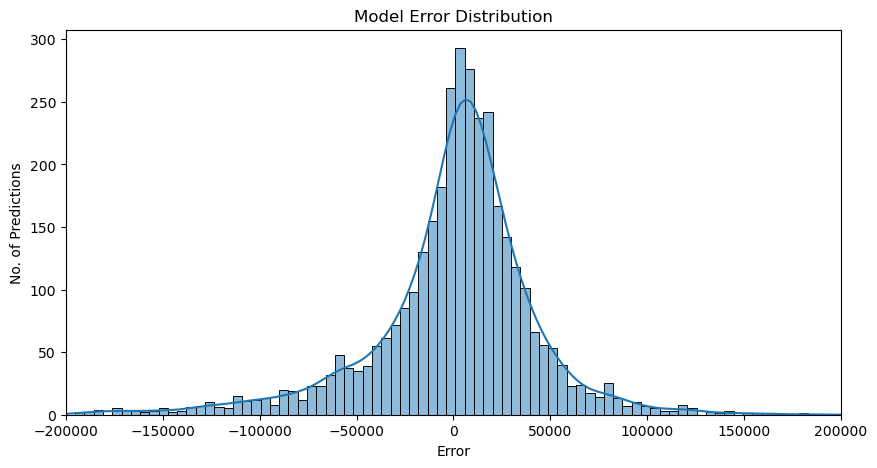

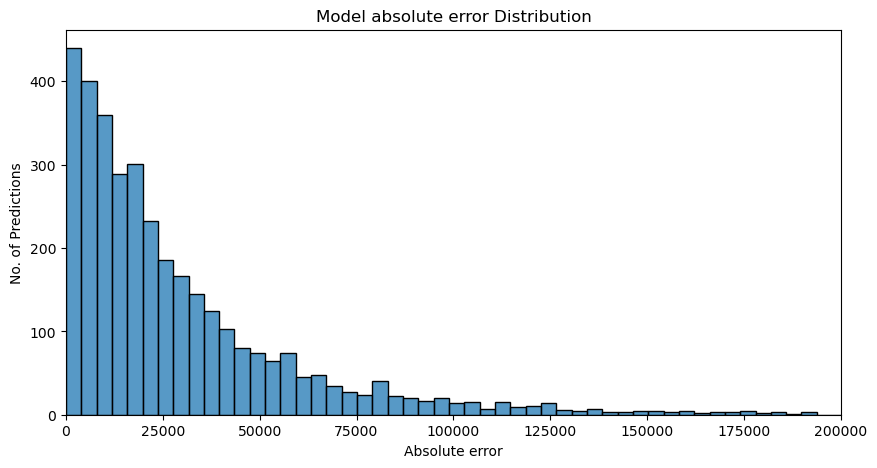

In [27]:
final_prediction = final_model.predict(X_test)
final_mse = mean_squared_error(y_test.values.ravel(), final_prediction)
final_rmse = np.sqrt(final_mse)
print('final_rmse: {}'.format(final_rmse))

error = final_prediction - y_test.values.ravel()
print('error_mean: {}'.format(np.mean(error)))
print('error_median: {}'.format(np.median(error)))
print('error_std: {}'.format(np.std(error)))

#Set plot size
plt.subplots(figsize=(10,5))
#Set X-Axis range
plt.xlim(-200000, 200000)
sns.histplot(error, kde=True)

plt.title('Model Error Distribution')
plt.ylabel('No. of Predictions')
plt.xlabel('Error')

plt.show()

#Set plot size
plt.subplots(figsize=(10,5))
#Set X-Axis range
plt.xlim(0, 200000)
sns.histplot(np.abs(error))

plt.title('Model absolute error Distribution')
plt.ylabel('No. of Predictions')
plt.xlabel('Absolute error')

plt.show()

In [28]:
#Probabilité de l'erreur sur le modèle dans un interval donné
error_mean = np.mean(error)
error_std = np.std(error)

upper_bondary = 50000
lower_bondary = -50000

prob = stats.norm.cdf(upper_bondary, loc=error_mean, scale=error_std) - \
       stats.norm.cdf(lower_bondary, loc=error_mean, scale=error_std)
prob

0.7469472123599716

## 4.6. Learning curve

In [29]:
train_errors, test_errors = [], []

for m in range(1, len(X_train), 100):
    y_train_predict = final_model.predict(X_train[:m])
    y_test_predict = final_model.predict(X_test[:m])
    
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test[:m], y_test_predict))

(0.0, 75000.0)

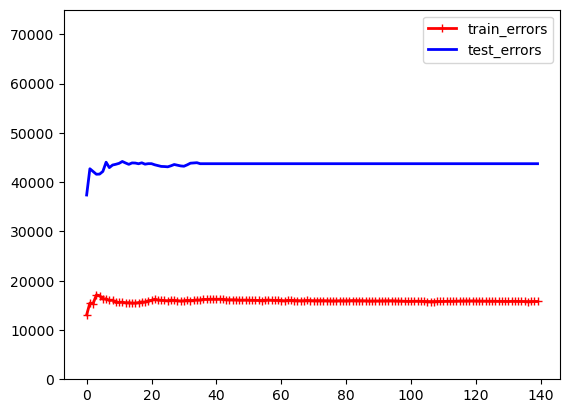

In [30]:
plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label=True)
plt.plot(np.sqrt(test_errors), 'b-', linewidth=2, label=True)
plt.legend(['train_errors', 'test_errors'])
plt.ylim([0, 75000])

## 4.6. Save final model

In [31]:
#save final model
model_file_name = 'Models/Final_model.pkl'
with open(model_file_name, 'wb') as file:
    pickle.dump(model, file)

# 5. Deploy model